In [80]:
from qiskit import QuantumCircuit, QuantumRegister, Aer
from qiskit.converters import circuit_to_gate
from qiskit.compiler import transpile

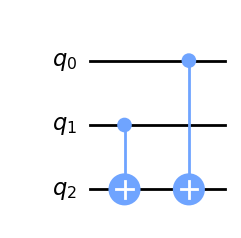

In [2]:
Sum = QuantumCircuit(3)
Sum.cx(1,2)
Sum.cx(0,2)
Sum.draw("mpl")

In [3]:
S = Sum.to_gate(label="S")

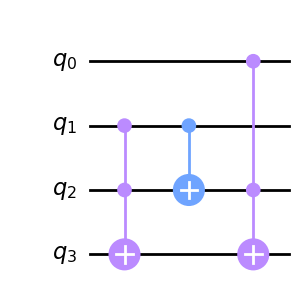

In [4]:
Carry = QuantumCircuit(4)
Carry.ccx(1, 2, 3)
Carry.cx(1,2)
Carry.ccx(0, 2, 3)
Carry.draw("mpl")

In [5]:
C = Carry.to_gate(label="C")

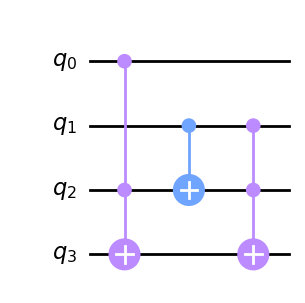

In [6]:
Carry_dagger = QuantumCircuit(4)
Carry_dagger.ccx(0, 2, 3)
Carry_dagger.cx(1,2)
Carry_dagger.ccx(1, 2, 3)
Carry_dagger.draw("mpl")

In [7]:
C_d = Carry_dagger.to_gate(label="C_d")

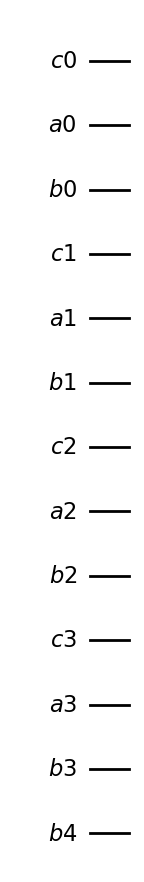

In [95]:
c0 = QuantumRegister(1, name="c0")
c1 = QuantumRegister(1, name="c1")
c2 = QuantumRegister(1, name="c2")
c3 = QuantumRegister(1, name="c3")

a0 = QuantumRegister(1, name="a0")
a1 = QuantumRegister(1, name="a1")
a2 = QuantumRegister(1, name="a2")
a3 = QuantumRegister(1, name="a3")

b0 = QuantumRegister(1, name="b0")
b1 = QuantumRegister(1, name="b1")
b2 = QuantumRegister(1, name="b2")
b3 = QuantumRegister(1, name="b3")
b4 = QuantumRegister(1, name="b4")

qc = QuantumCircuit(
    c0,
    a0,
    b0,
    c1,
    a1,
    b1,
    c2,
    a2,
    b2,
    c3,
    a3,
    b3,
    b4
)
qc.draw("mpl")

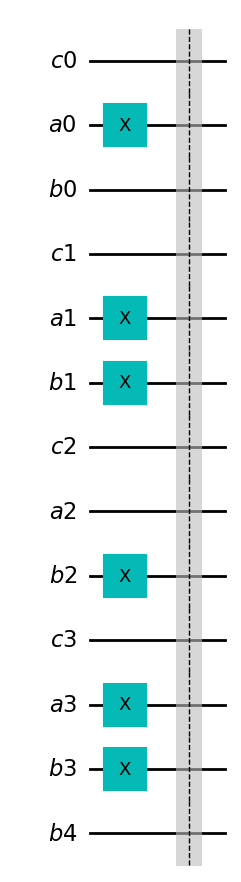

In [15]:
qc.x(a0)
qc.x(a1)
qc.x(b1)
qc.x(b2)
qc.x(a3)
qc.x(b3)
qc.barrier()
qc.draw("mpl")

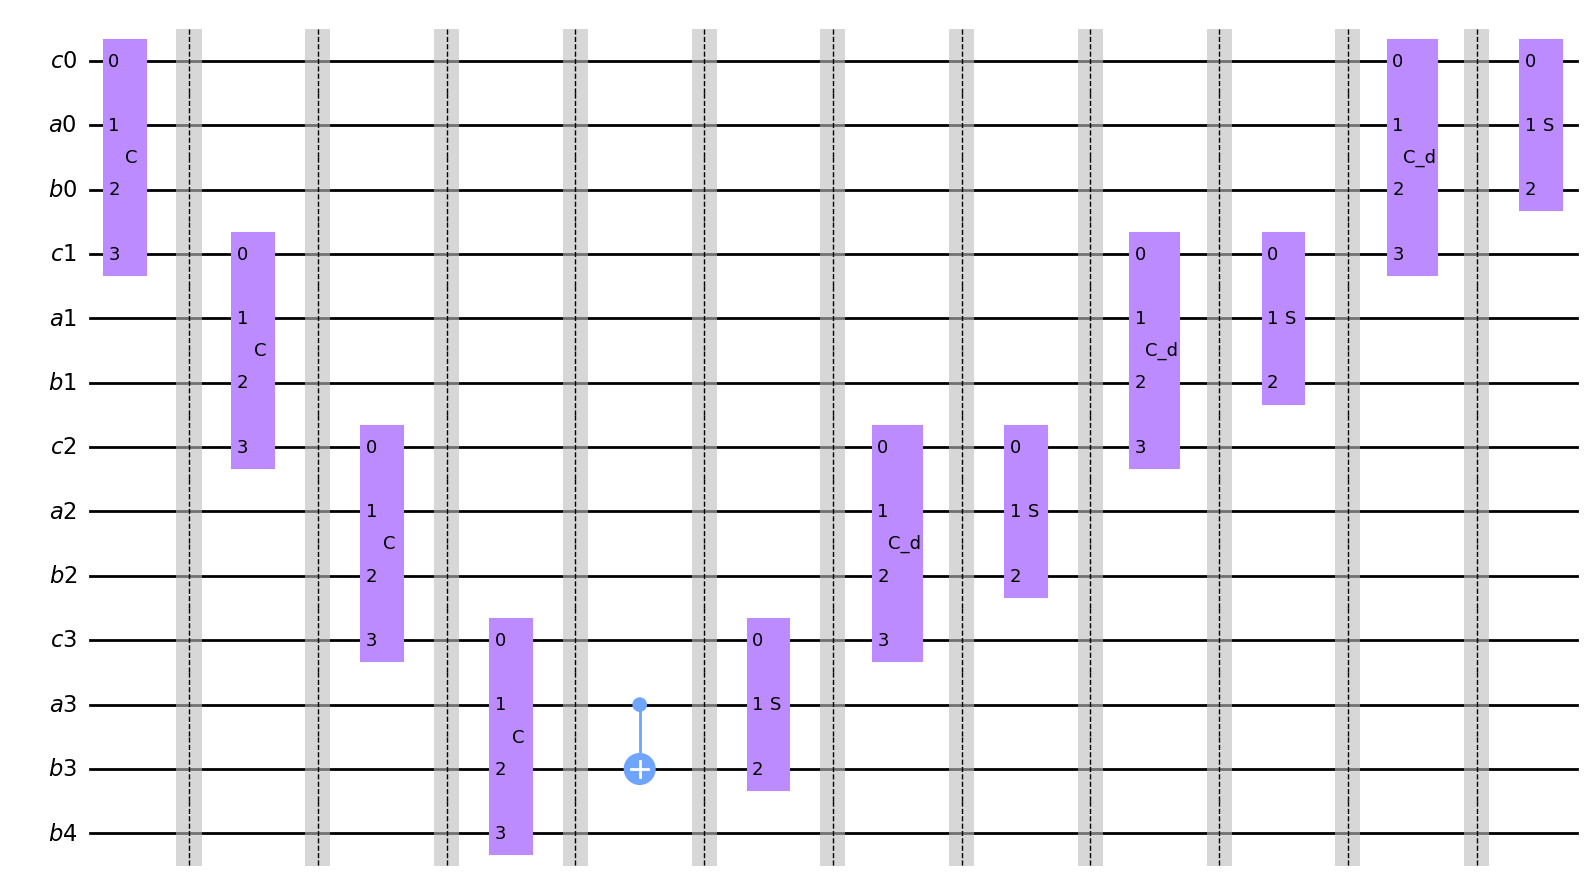

In [93]:
qc.append(C, [c0, a0, b0, c1])
qc.barrier()
qc.append(C, [c1, a1, b1, c2])
qc.barrier()
qc.append(C, [c2, a2, b2, c3])
qc.barrier()
qc.append(C, [c3, a3, b3, b4])
qc.barrier()

qc.cx(a3, b3)
qc.barrier()

qc.append(S, [c3, a3, b3])
qc.barrier()
qc.append(C_d, [c2, a2, b2, c3])
qc.barrier()
qc.append(S, [c2, a2, b2])
qc.barrier()
qc.append(C_d, [c1, a1, b1, c2])
qc.barrier()
qc.append(S, [c1, a1, b1])
qc.barrier()
qc.append(C_d, [c0, a0, b0, c1])
qc.barrier()
qc.append(S, [c0, a0, b0])


qc.draw("mpl")

In [29]:
from qiskit.quantum_info import Statevector

In [30]:
Statevector(qc).draw("latex")

<IPython.core.display.Latex object>

In [72]:
Statevector(qc).draw("latex")

<IPython.core.display.Latex object>

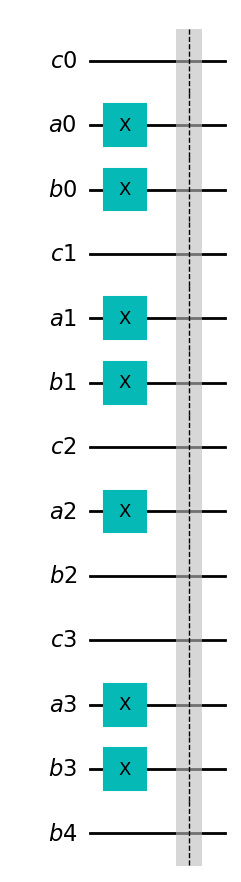

In [68]:
# 1111 
qc.x(a0)
qc.x(a1)
qc.x(a2)
qc.x(a3)

# 1011
qc.x(b0)
qc.x(b1)
qc.x(b3)
qc.barrier()
qc.draw("mpl")

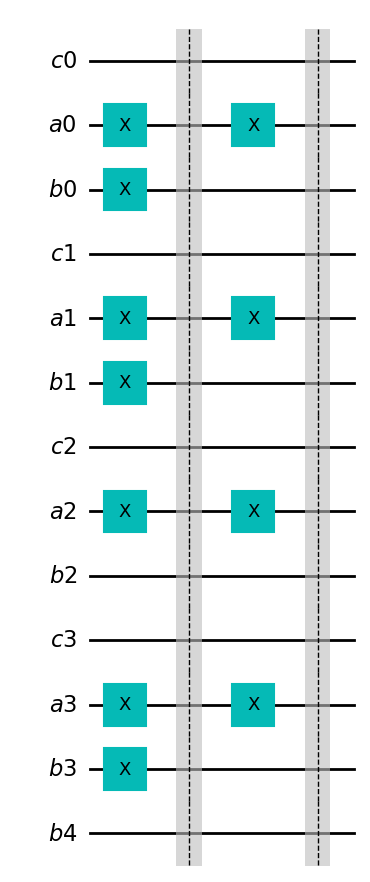

In [69]:
qc.x(a0)
qc.x(a1)
qc.x(a2)
qc.x(a3)
qc.barrier()
qc.draw("mpl")

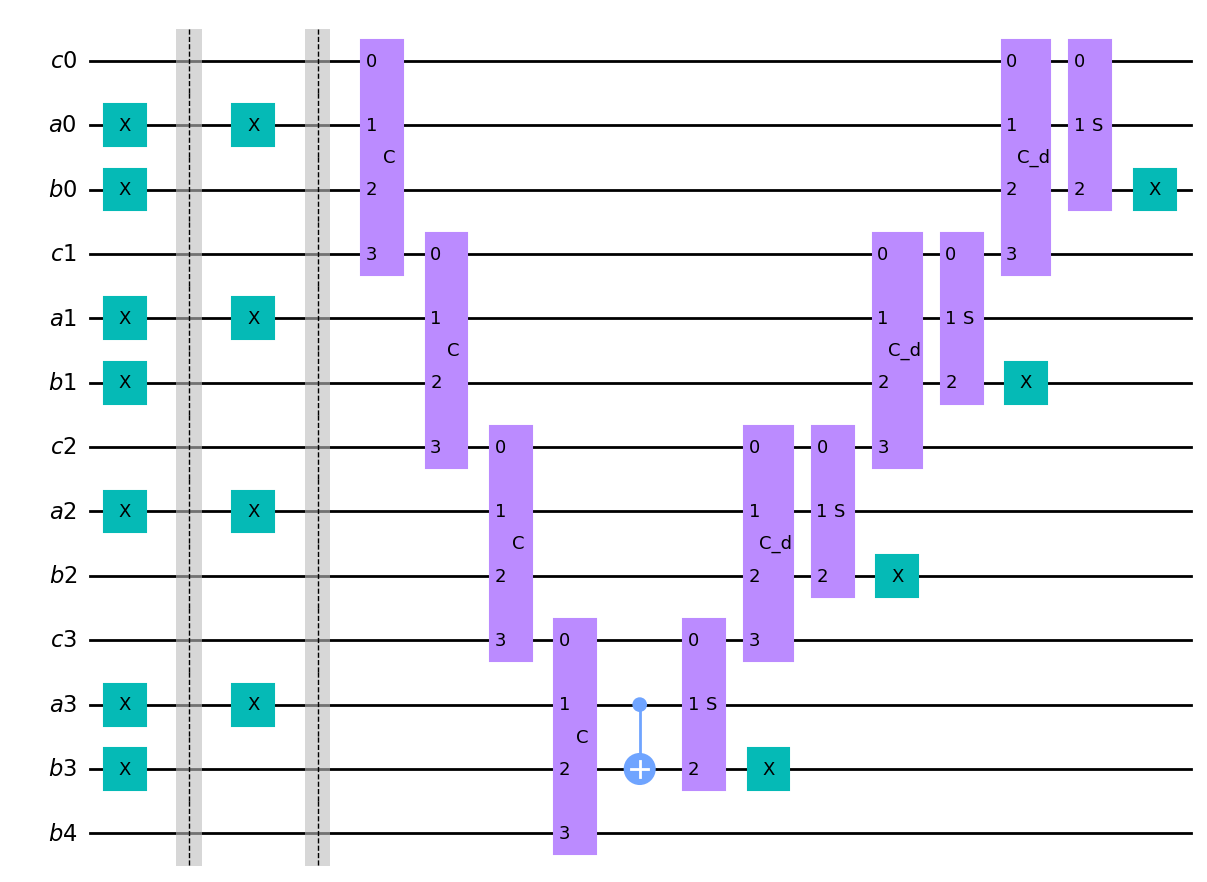

In [71]:
qc.x(b0)
qc.x(b1)
qc.x(b2)
qc.x(b3)
qc.draw("mpl")

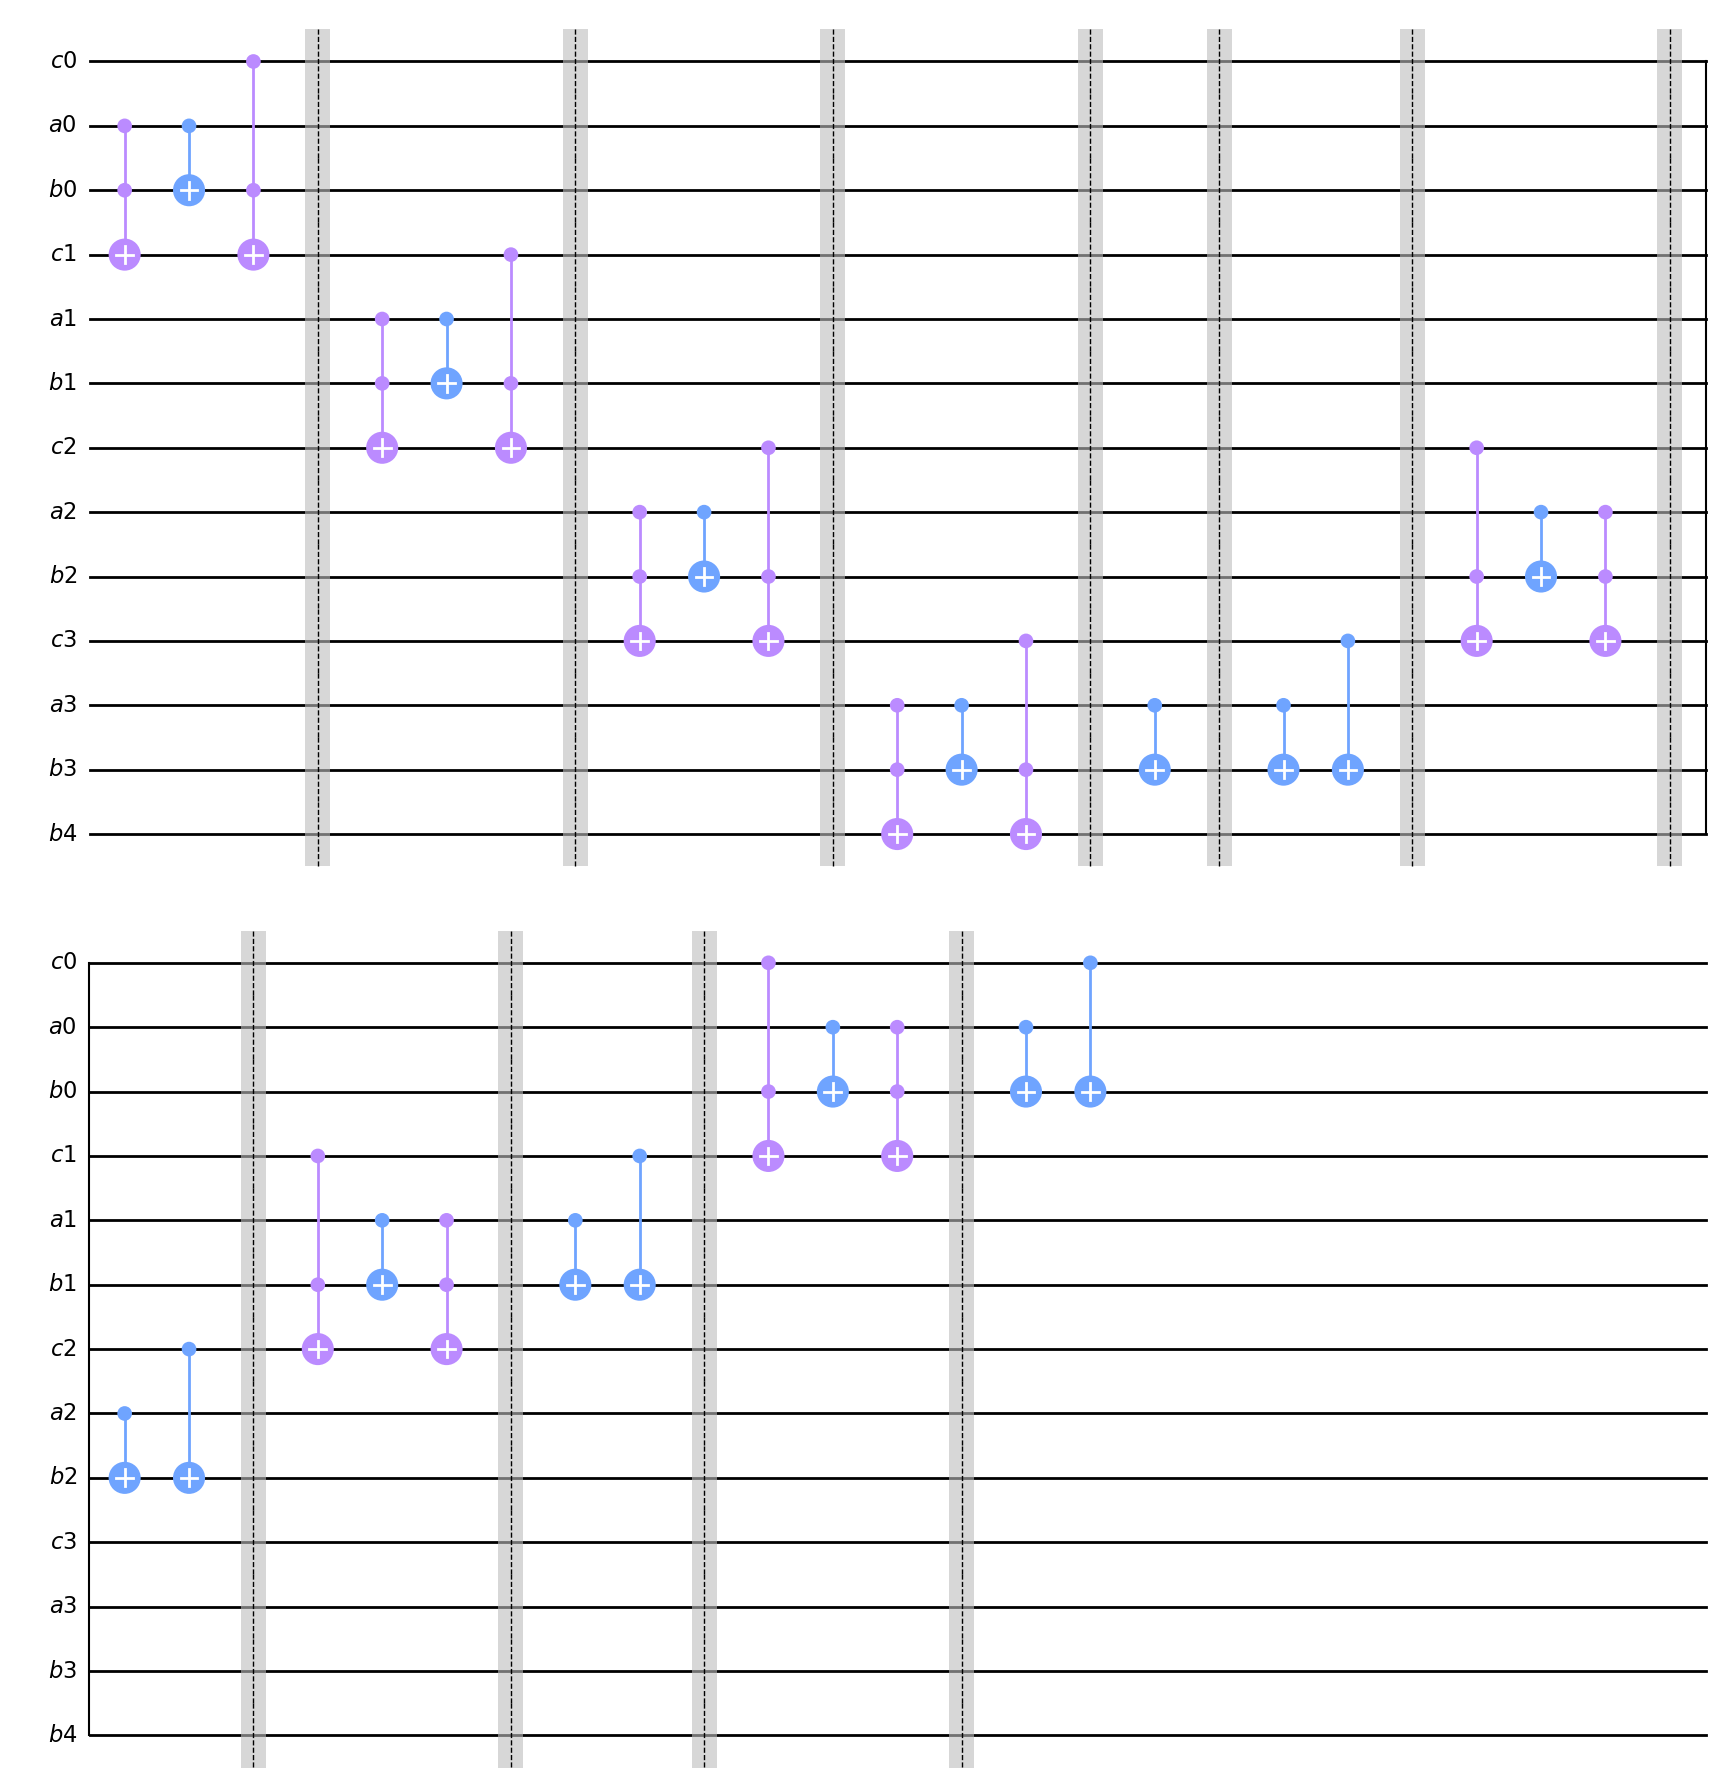

In [94]:
sim = Aer.get_backend('aer_simulator')
transpile(qc, sim).draw("mpl")

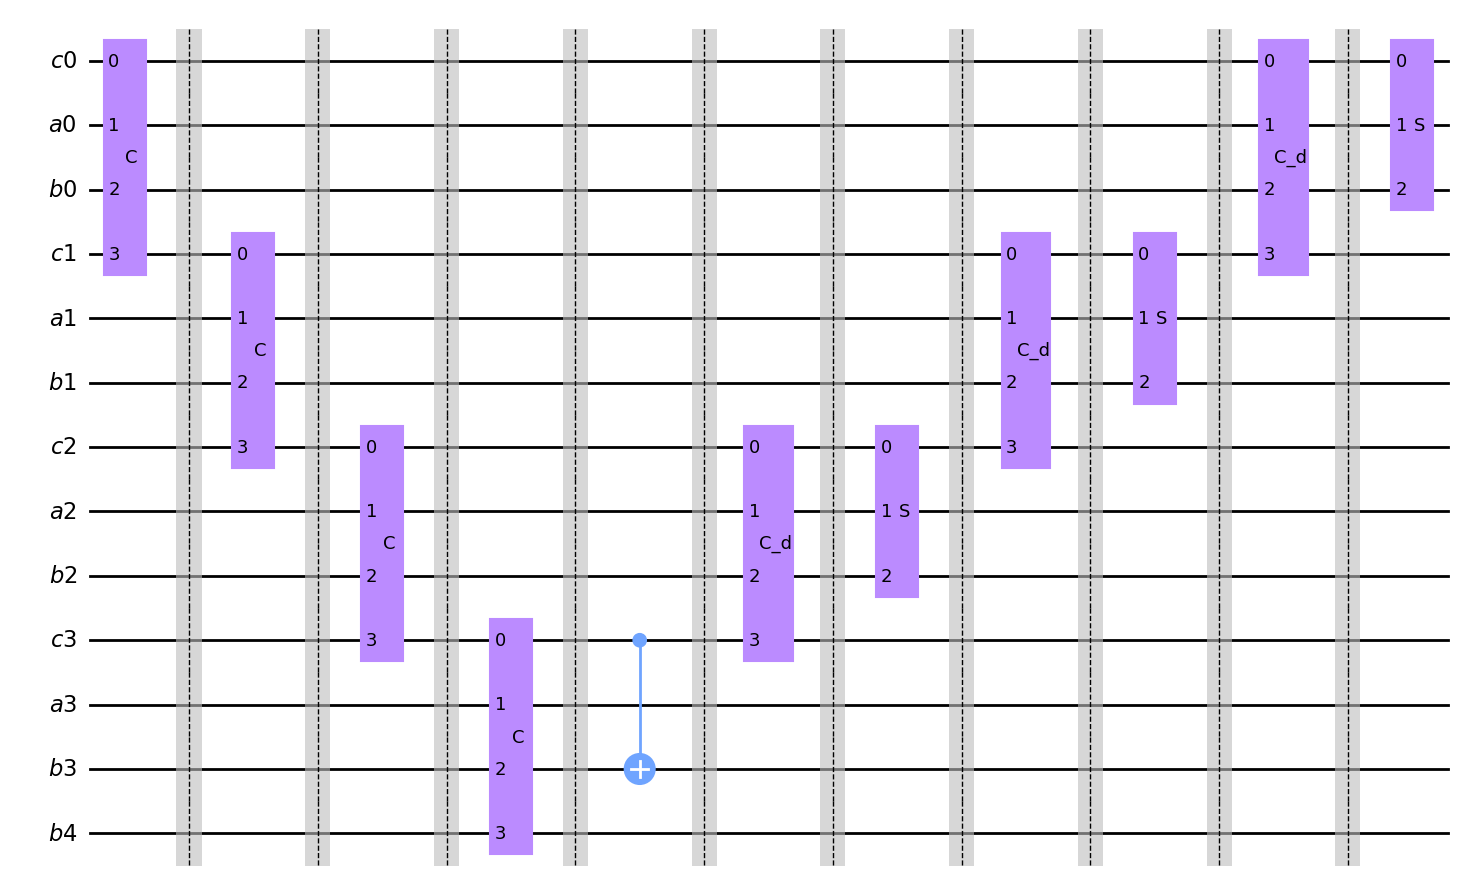

In [96]:
qc.append(C, [c0, a0, b0, c1])
qc.barrier()
qc.append(C, [c1, a1, b1, c2])
qc.barrier()
qc.append(C, [c2, a2, b2, c3])
qc.barrier()
qc.append(C, [c3, a3, b3, b4])
qc.barrier()

qc.cx(c3, b3)
qc.barrier()
qc.append(C_d, [c2, a2, b2, c3])
qc.barrier()
qc.append(S, [c2, a2, b2])
qc.barrier()
qc.append(C_d, [c1, a1, b1, c2])
qc.barrier()
qc.append(S, [c1, a1, b1])
qc.barrier()
qc.append(C_d, [c0, a0, b0, c1])
qc.barrier()
qc.append(S, [c0, a0, b0])


qc.draw("mpl")

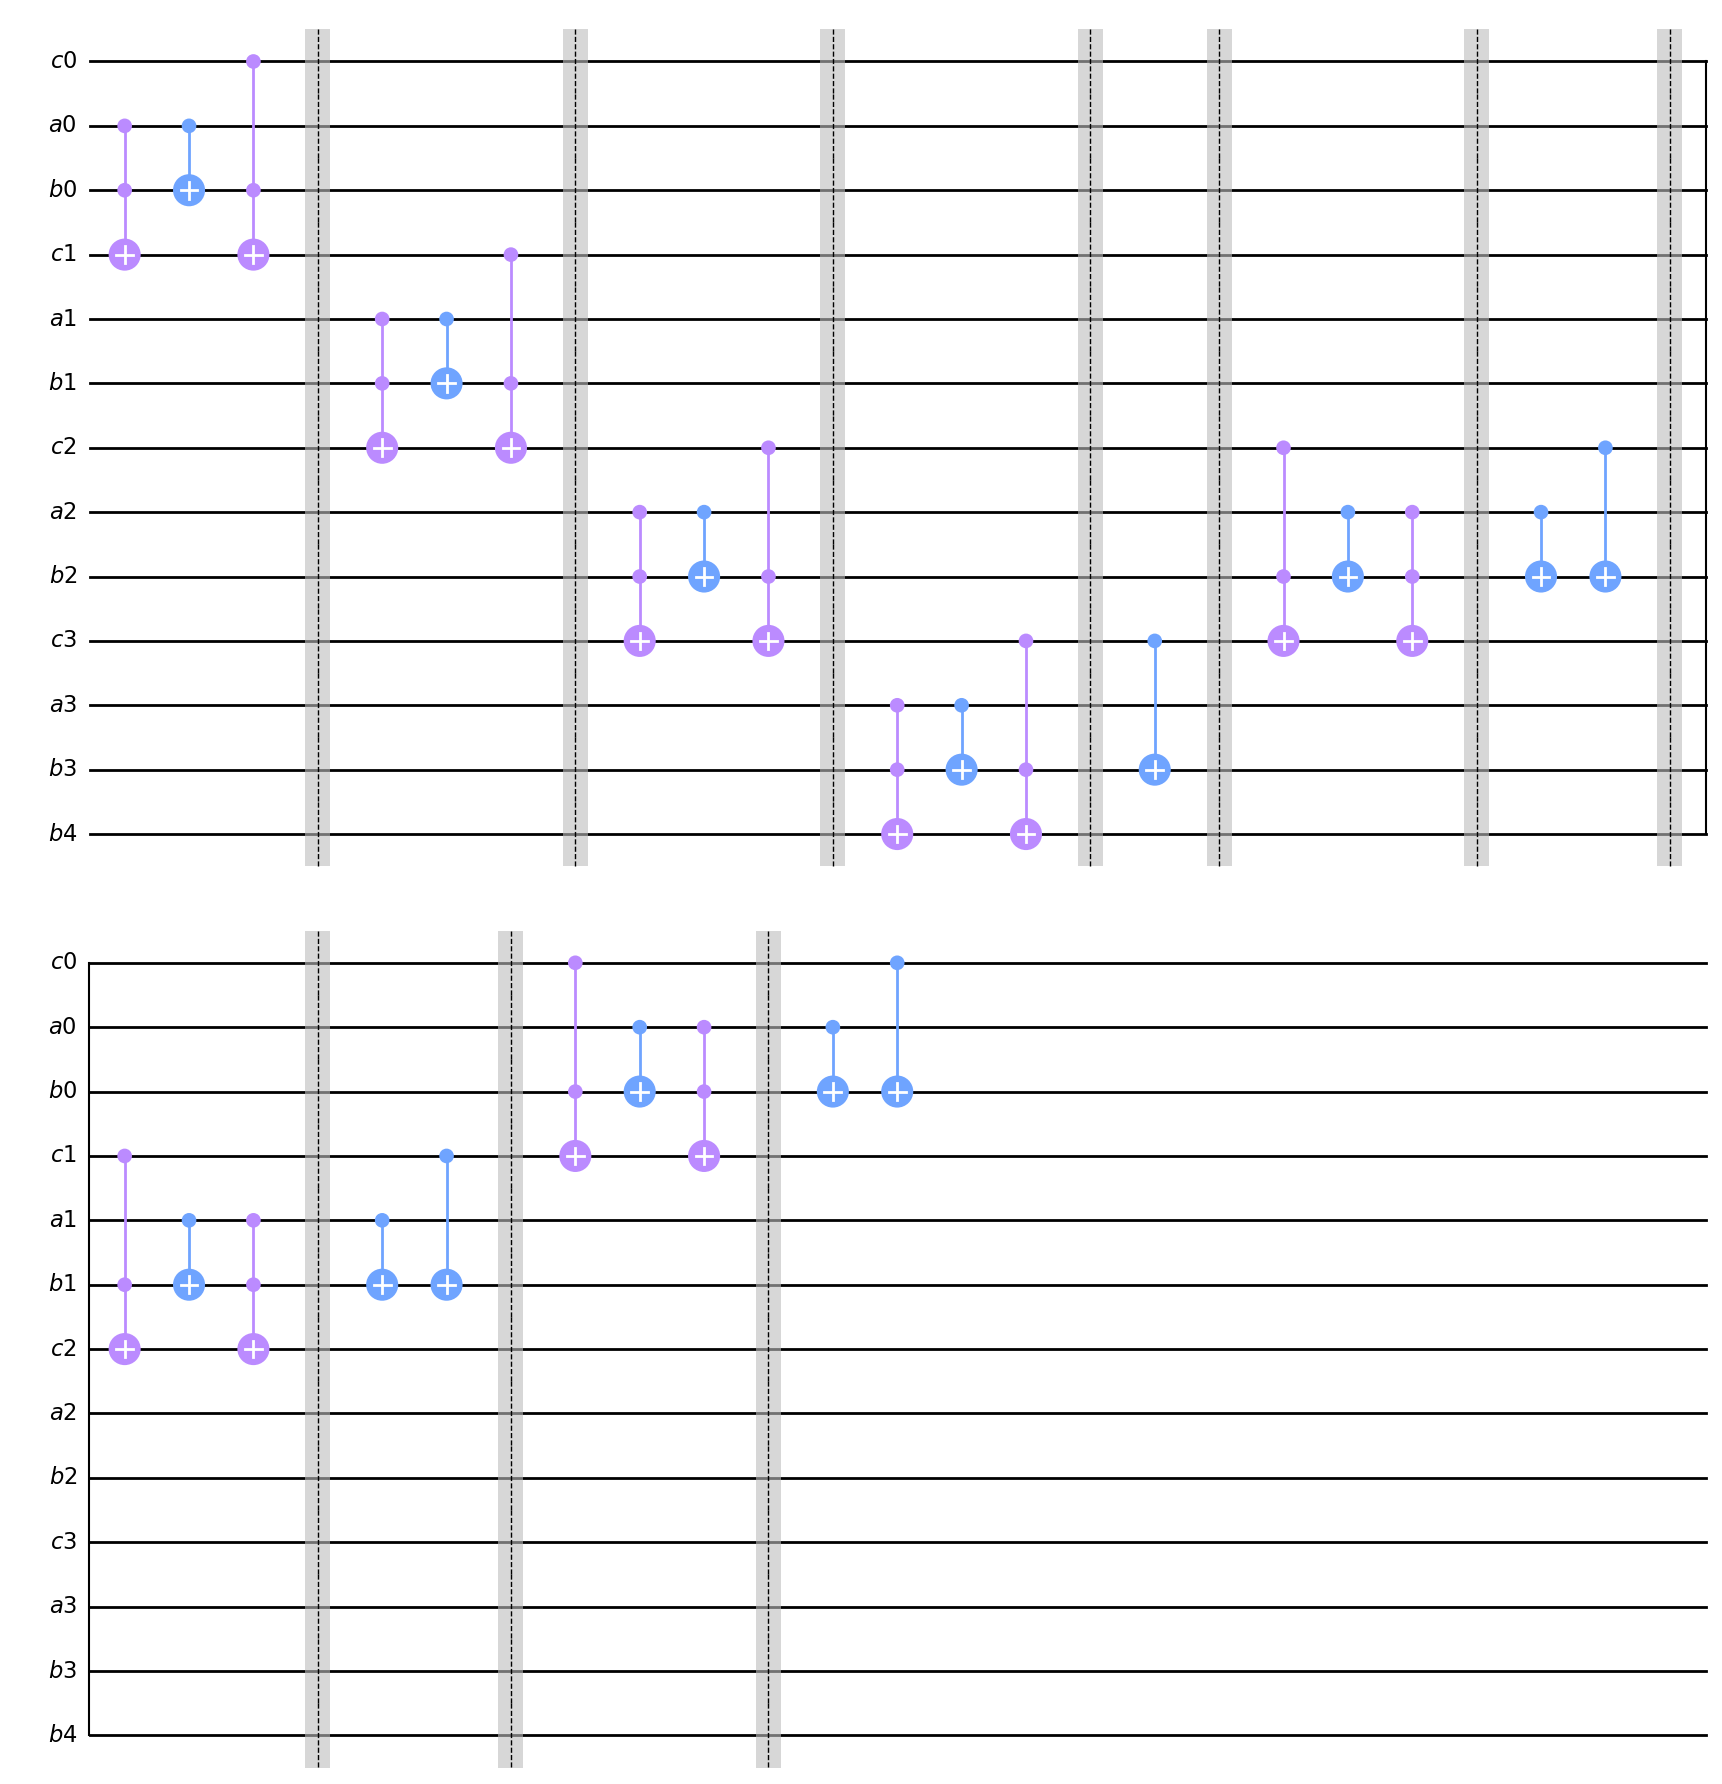

In [97]:
sim = Aer.get_backend('aer_simulator')
transpile(qc, sim).draw("mpl")